In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import neurokit2 as nk

# set global parameters
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
# mpl.style.use("ggplot") # selecting the style sheet

from lists import dyads, num_dyads, participants, num_participants

In [2]:
# Set sampling rate
sampling_rate = 1000
print("Sampling rate:", sampling_rate)

# Set conditions
condition = ["sit","gaze"]
print("Conditions:", condition)

# Show number of participants
print("Participants:", num_participants)

# Show number of dyads
print("Dyads:", num_dyads)

Sampling rate: 1000
Conditions: ['sit', 'gaze']
Participants: 4
Dyads: 2


In [3]:
# Calculate heart rates
heartrate_temp = []
dict_temp = {}
heartrates = np.zeros((len(condition), num_dyads, 2))

for i, con in enumerate(condition):
    ecg_raw_2000hz = np.load(f"data/ecg_raw/ecg_raw_{con}.npy")
    for j in range(num_participants):
        r_peaks_temp, intervals_temp = nk.ecg_peaks(
            ecg_raw_2000hz[j], sampling_rate=2000, method="neurokit", correct_artifacts=True)
        heartrate_temp.append(sum(r_peaks_temp["ECG_R_Peaks"])/5)
        dict_temp[i] = heartrate_temp
    heartrate_temp = []
    print(f"Average heart rates per person in condition {con.upper()}")
    # Save data as 3D array
    # index for dyads
    for k, idx in enumerate(list(range(num_participants))[::2]):
        heartrates[i][k][0] = dict_temp[i][idx]
        heartrates[i][k][1] = dict_temp[i][idx+1]
        print(
            f"Dyad {k}: Female: {dict_temp[i][idx]} Male: {dict_temp[i][idx+1]}")

print("\nAverage heart rates and SD over all participants")

heartrate_mean = pd.DataFrame(
    {"Female": [np.mean(heartrates[0, :, 0]), np.mean(heartrates[1, :, 0]), np.mean(heartrates[:, :, 0])],
     "Male": [np.mean(heartrates[0, :, 1]), np.mean(heartrates[1, :, 1]), np.mean(heartrates[:, :, 1])],
     "All": [np.mean(heartrates[0, :, :]), np.mean(heartrates[1, :, :]), np.mean(heartrates[:, :, :])]},
    index=["SIT", "GAZE", "All"])
print(heartrate_mean)

heartrate_std = pd.DataFrame(
    {"Female": [np.std(heartrates[0, :, 0]), np.std(heartrates[1, :, 0]), np.std(heartrates[:, :, 0])],
     "Male": [np.std(heartrates[0, :, 1]), np.std(heartrates[1, :, 1]), np.std(heartrates[:, :, 1])],
     "All": [np.std(heartrates[0, :, :]), np.std(heartrates[1, :, :]), np.std(heartrates[:, :, :])]},
    index=["SIT", "GAZE", "All"])
heartrate_std = heartrate_std.round(2)
print(heartrate_std)

Average heart rates per person in condition SIT
Dyad 0: Female: 72.4 Male: 60.2
Dyad 1: Female: 70.0 Male: 69.6
Average heart rates per person in condition GAZE
Dyad 0: Female: 70.8 Male: 60.8
Dyad 1: Female: 73.4 Male: 66.8

Average heart rates and SD over all participants
      Female   Male    All
SIT    71.20  64.90  68.05
GAZE   72.10  63.80  67.95
All    71.65  64.35  68.00
      Female  Male   All
SIT     1.20  4.70  4.66
GAZE    1.30  3.00  4.75
All     1.33  3.98  4.70


In [4]:
# Load ECG-data as list and downsaples to 1000 Hz
ecg_raw_2000hz = np.load(f"data/ecg_raw/ecg_raw_{condition[1]}.npy")
ecg_raw = []

for i in range(num_participants):
    ecg_raw.append(ecg_raw_2000hz[i][::2])  # change sampling rate to 1000 Hz

In [5]:
# Analyze raw ECG data
ecg_process = []
ecg = []
for i in range(num_participants):
    ecg_process_temp, info_temp = nk.ecg_process(
        ecg_raw[i], sampling_rate=sampling_rate)
    ecg_process.append(ecg_process_temp)
    ecg.append(ecg_process[i]["ECG_Clean"])

ecg_process[1]

C:\conda\envs\two-hearts\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\conda\envs\two-hearts\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.002747,-0.001255,60.775845,0.825214,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.003204,-0.001218,60.775845,0.825214,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.002899,-0.001180,60.775845,0.825214,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.003204,-0.001142,60.775845,0.825214,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.003052,-0.001102,60.775845,0.825214,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.009003,-0.005594,57.581574,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299996,-0.008087,-0.005287,57.581574,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299997,-0.007782,-0.004978,57.581574,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299998,-0.007782,-0.004667,57.581574,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [6]:
xlim1 = 10*sampling_rate
xlim2 = 14*sampling_rate

dpi = 96
figsize = 8, 4

mpl.rcParams["legend.frameon"] = True
mpl.rcParams["legend.fancybox"] = False
mpl.rcParams["legend.framealpha"] = 0.9
mpl.rcParams["legend.edgecolor"] = "darkgrey"

d = 0  # dyad
p = 1  # person

In [7]:
# Calculate all data sets
from math import pi, cos
rpeaks = []
ibi = []
start = []
ibi_ts = []

lim1 = []
lim2 = []

ibi_ts_ip = []
ibi_ts_ip_1hz = []
ibi_ts_ip_win = []

ibi_all = []
ibi_ts_ip_1hz_all = []
ibi_ts_ip_win_all = []

data = []

# Get binary R-peak time series
for i in range(num_participants):
    rpeaks.append(ecg_process[i]["ECG_R_Peaks"])  # binary data

# Calculate IBIs
def get_ibi(rpeaks):
    start = np.squeeze(np.array(np.where(rpeaks == 1)))
    ibi = []
    for i in range(len((start))):
        if i > 0:  # skip first iteration
            ibi.append(start[i]-start[i-1])
    # start[1], not start[0], to get the true starting point for the IBI-intervals (=differences of start)
    return ibi, start[1]

for i in range(num_participants):
    ibi_temp, start_temp = get_ibi(rpeaks[i])
    ibi.append(ibi_temp)
    start.append(start_temp)

# Calculate IBI data as time series (Tachogram)
def get_ibi_timeseries(rpeaks, ibi, start, begin_at_0):
    ibi_ts = rpeaks[start:]
    ibi_ts = np.array(ibi_ts)

    j = 0
    for i in range(len(ibi_ts)):
        if ibi_ts[i] == 1:
            ibi_ts[i] = ibi[j]
            j = j+1
    ibi_ts = pd.Series(ibi_ts)
    # add zeros for true lenght of the time series
    if begin_at_0 == "True":
        intro = pd.Series(np.zeros(start))
        ibi_ts = pd.concat([intro, ibi_ts], ignore_index=True)
    return ibi_ts

for i in range(num_participants):
    ibi_ts.append(get_ibi_timeseries(rpeaks[i], ibi[i], start[i], "True"))

# Calculate the limits to plot IBIs within the time interval from xlim1 to xlim2
def get_ibi_limits(ibi, ibi_ts, xlim1, xlim2):
    lim1_time = np.argmax(ibi_ts[xlim1:xlim2] > 0) + xlim1
    lim2_time = xlim2 - np.argmax(ibi_ts[xlim2:xlim1:-1] > 0)

    lim1 = ibi.index(ibi_ts[lim1_time])
    lim2 = ibi.index(ibi_ts[lim2_time])

    return lim1, lim2

for i in range(num_participants):
    lim1_temp, lim2_temp = get_ibi_limits(
        ibi[i], ibi_ts[i], xlim1=xlim1, xlim2=xlim2)
    lim1.append(lim1_temp)
    lim2.append(lim2_temp)

# Imputate IBIs
def get_ibi_timeseries_interpolated(ibi_ts):
    ibi_ts_ip = ibi_ts.replace(0, np.nan, inplace=False)
    ibi_ts_ip = ibi_ts_ip.interpolate(
        method='linear', axis=0, limit=None, inplace=False)
    return ibi_ts_ip

for i in range(num_participants):
    ibi_ts_ip.append(get_ibi_timeseries_interpolated(ibi_ts[i]))

# Resampling at 1 Hz with rolling windows
def get_ibi_timeseries_interpolated_window(ibi_ts_ip):
    ibi_ts_ip_win = ibi_ts_ip.rolling(sampling_rate, center=True).mean()
    ibi_ts_ip_win = ibi_ts_ip_win.iloc[::sampling_rate]
    return ibi_ts_ip_win

ibi_ts_ip_win = []
for i in range(num_participants):
    ibi_ts_ip_win.append(get_ibi_timeseries_interpolated_window(ibi_ts_ip[i]))

# Resampling imputeted IBI at 1 Hz
for i in range(num_participants):
    ibi_ts_ip_1hz.append(ibi_ts_ip[i][::sampling_rate])

# Prepare data for violin plot
def flatten(nested_list):
    list_of_lists = []
    for item in nested_list:
        list_of_lists.extend(item)
    return list_of_lists

ibi_all = flatten(ibi)

for i in range(num_participants):
    ibi_ts_ip_1hz_all.append(np.array(ibi_ts_ip_1hz[i].dropna()))
ibi_ts_ip_1hz_all = flatten(ibi_ts_ip_1hz_all)

for i in range(num_participants):
    ibi_ts_ip_win_all.append(np.array(ibi_ts_ip_win[i].dropna()))
ibi_ts_ip_win_all = flatten(ibi_ts_ip_win_all)

# Cosine interpolation
def cosine(x, x1, x2):
    T = x2-x1
    val = 0.5 * cos(2.0 * pi * (x - x1) / T)
    return val

def get_rpeaks_cosine_interpolation(rpeaks):
    rpeaks_idx = [i for i, x in enumerate(rpeaks) if x == 1]
    rpeaks_cip = [np.nan]*rpeaks_idx[0]
    for i in range(len(rpeaks_idx)):
        if i == len(rpeaks_idx)-1:
            break
        x1 = rpeaks_idx[i]
        x2 = rpeaks_idx[i+1]
        T = x2-x1
        def f(x): return cosine(x, x1, x2)
        x = np.linspace(x1, x2, T)
        y = [f(x) for x in x]

        rpeaks_cip = rpeaks_cip + y
    rpeaks_cip = rpeaks_cip + [np.nan]*(len(rpeaks)-rpeaks_idx[-1])
    return rpeaks_cip  # keep in mind there are nans at the start and end

for i in range(num_participants):
    data.append(get_rpeaks_cosine_interpolation(rpeaks[i]))

# Normalize data
def get_normalized_df(df):
    normalized_df = (df-df.min())/(df.max()-df.min())
    return normalized_df

1064.0
1
0.5
300000
1355 1192 1190
0.999996933791923
30911.0 33230.76071322054 33242.003797097306


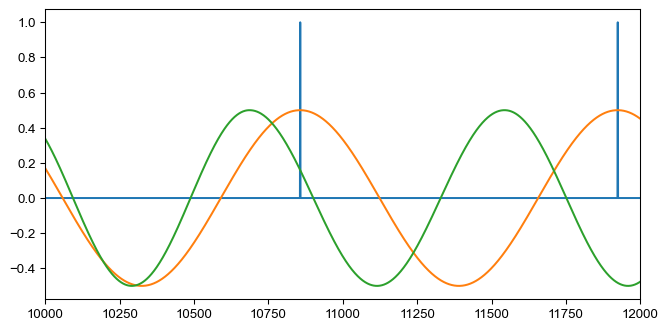

In [8]:
# Sanity checks
rpeaks_idx = []
for i in range(num_participants):
    rpeaks_idx.append([i for i, x in enumerate(rpeaks[p]) if x == 1])

q = 200
print(ibi_ts[p][rpeaks_idx[p][q]])
print(rpeaks[p][rpeaks_idx[p][q]])
print(data[p][rpeaks_idx[p][q]])

fig = plt.figure(figsize=(8, 4), dpi=96)
plt.xlim(10000, 12000)
plt.plot(rpeaks[p])
plt.plot(data[p])
plt.plot(data[p+1])

print(len(data[p]))  # 300.000

print(len(ibi_all), len(ibi_ts_ip_1hz_all), len(ibi_ts_ip_win_all))

# Comparision with data input for LSTM model (at 50 Hz)
print(np.corrcoef(data[p][2000:298000:20], np.load(
    f"data/data_{condition[1]}.npy")[p])[0, 1])

# Checksum for IBI and imputated IBI
print(sum(ibi_ts[p][9000:40000]), sum(
    ibi_ts_ip_win[p][9:40]), sum(ibi_ts_ip_1hz[p][9:40]))

Number of R-peaks in plot: 5 4


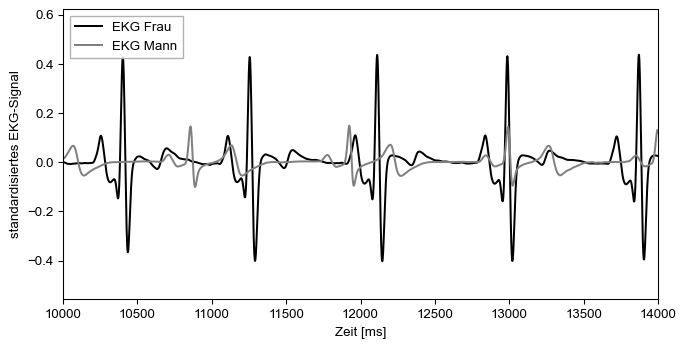

In [9]:
# Plot cleaned ECG data for a dyad
fig = plt.figure(figsize=figsize, dpi=dpi)

plt.xlim(xlim1, xlim2)
plt.margins(x=0)

plt.xlabel('Zeit [ms]')
plt.ylabel('standardisiertes EKG-Signal')

plt.plot(ecg[d], color="black", label="EKG Frau")
plt.plot(ecg[d+1], color="grey", label="EKG Mann")
plt.legend(loc="upper left")
print("Number of R-peaks in plot:",
      sum(rpeaks[d][xlim1:xlim2]), sum(rpeaks[d+1][xlim1:xlim2]))

Number of R-peaks in plot: 354 304


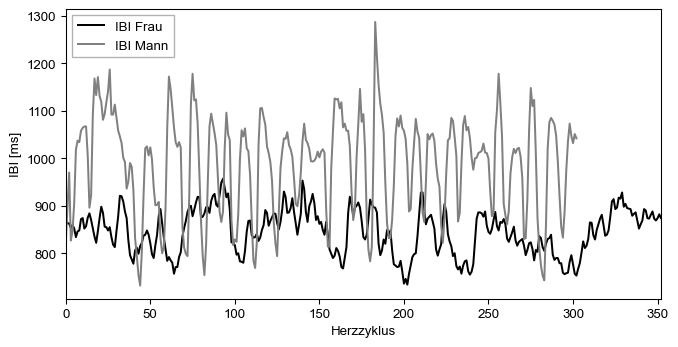

In [10]:
# Plot IBI data
fig = plt.figure(figsize=figsize, dpi=dpi)

plt.margins(x=0)

plt.xlabel('Herzzyklus')
plt.ylabel('IBI [ms]')

plt.plot(ibi[d], color="black", label="IBI Frau")
plt.plot(ibi[d+1], color="grey", label="IBI Mann")
plt.legend(loc="upper left")

print("Number of R-peaks in plot:", sum(rpeaks[d]), sum(rpeaks[d+1]))

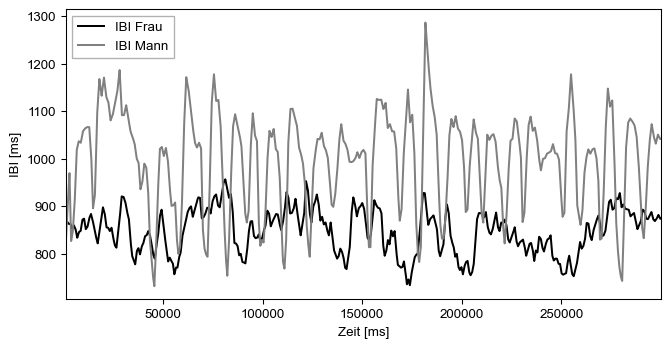

In [11]:
# Plot imputated IBIs
fig = plt.figure(figsize=figsize, dpi=dpi)

plt.margins(x=0)

plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')

plt.plot(ibi_ts_ip[d], color="black", label="IBI Frau")
plt.plot(ibi_ts_ip[d+1], color="grey", label="IBI Mann")
plt.legend(loc="upper left")

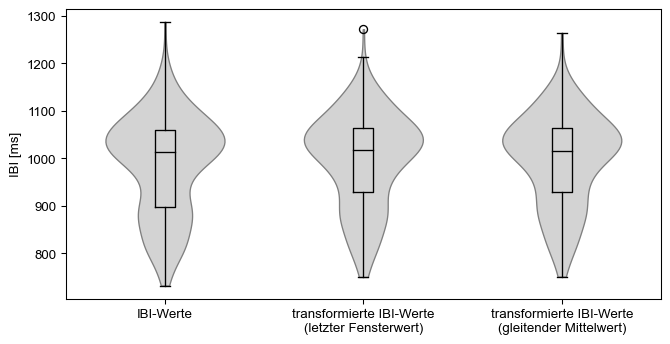

In [12]:
# Create Violin plot
dataset = {
    "all": [np.array(ibi_all), np.array(ibi_ts_ip_1hz_all), np.array(ibi_ts_ip_win_all)],
    "individual": [np.array(ibi[p]), np.array(ibi_ts_ip_1hz[p].dropna()), np.array(ibi_ts_ip_win[p].dropna())]
}

positions = [1, 2, 3]

# Draw violin plot with box plot
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

plt.margins(y=0.05)
plt.margins(x=0.0)

# Plot data individual / all
vp = ax.violinplot(dataset=dataset["individual"], positions=[
                   1, 2, 3], vert=True, widths=0.6, showmeans=False, showextrema=False, showmedians=False)
bp = ax.boxplot(dataset["individual"], positions=[
                1, 2, 3], widths=0.1, patch_artist=False, medianprops=dict(color="black"))

plt.xticks(ticks=[1, 2, 3], labels=["IBI-Werte", "transformierte IBI-Werte\n(letzter Fensterwert)",
           "transformierte IBI-Werte\n(gleitender Mittelwert)"])
plt.ylabel('IBI [ms]')

for body in vp['bodies']:
    body.set_facecolor('lightgrey')
    body.set_edgecolor('grey')
    body.set_alpha(1)

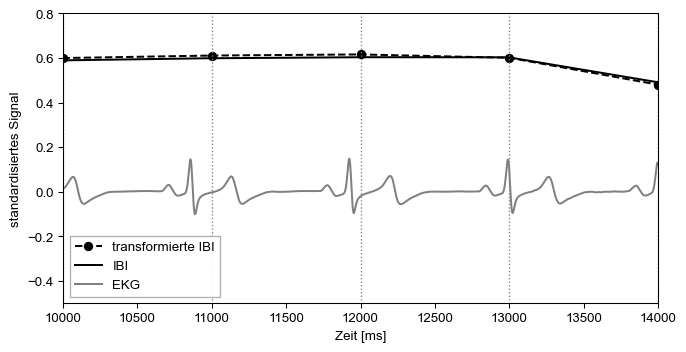

In [13]:
# Plot linear interpolated IBIs
# Reminder: plot data with different number of datapoints for IBI and tranformed IBI
fig = plt.figure(figsize=figsize, dpi=dpi)

plt.xlim(xlim1, xlim2)
plt.ylim(ymax=0.8, ymin=-0.5)
plt.margins(x=0)

plt.xlabel('Zeit [ms]')
plt.ylabel('standardisiertes Signal')

plt.plot(get_normalized_df(ibi_ts_ip_win[p]), 'k--o', label="transformierte IBI")
plt.plot(get_normalized_df(ibi_ts_ip[p]), 'k-', label="IBI")
plt.plot(ecg[p], '-', color='grey', label="EKG")
plt.legend(loc="best")

# multiple lines all full height
plt.vlines(x=list(range(0, len(rpeaks[0]), 1000)), ymin=-2, ymax=2,
           colors='grey', ls=':', lw=1, label='vline_multiple - full height')


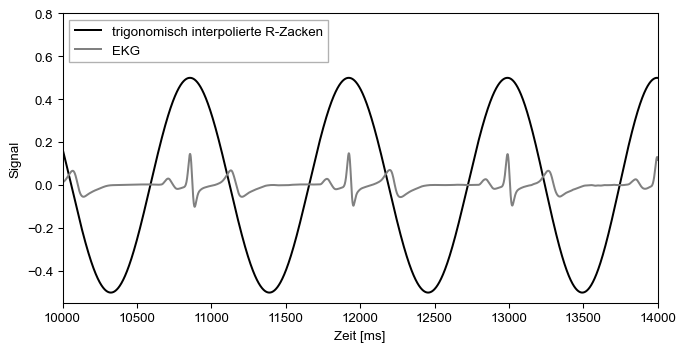

In [14]:
# Plot trigonomic interpolated R-peaks
fig = plt.figure(figsize=figsize, dpi=dpi)

plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.ylim(ymax=0.8, ymin=-0.55)

plt.xlabel('Zeit [ms]')
plt.ylabel('Signal')

plt.plot(data[p], "k-", label="trigonomisch interpolierte R-Zacken")
plt.plot(ecg[p], "-", color='grey', label="EKG")
plt.legend(loc="upper left")

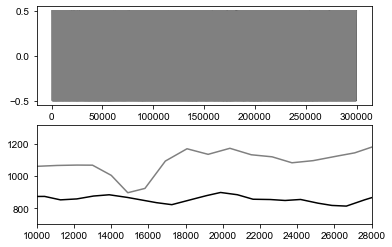

In [15]:
# TODO
# plt.figure(figsize=(10,4))

fig, (ax1, ax2) = plt.subplots(2)
plt.xlim(xlim1, xlim2*2)

ax1.plot(data[0],color='black',label="Female")
ax1.plot(data[1],color='grey',label="Male")
# plt.legend(loc="best")

# fig = plt.figure(figsize=(8,4), dpi=256)


ax2.plot(ibi_ts_ip[0],color='black',label="Female")
ax2.plot(ibi_ts_ip[1],color='grey',label="Male")

# plt.legend(loc="best")


In [16]:
a = np.array([data[0][10000:310000], data[1][10000:310000]])
b = np.array(data[1][10000:310000])
a = np.transpose(a)
# df = np.array[a,b]
df = pd.DataFrame(a)
df

# df.to_csv("df.csv")

,0,1
0,-0.484665,0.170161
1,-0.483768,0.167379
2,-0.482846,0.164591
3,-0.481899,0.161798
4,-0.480927,0.158999
...,...,...
289995,NaN,NaN
289996,NaN,NaN
289997,NaN,NaN
289998,NaN,NaN


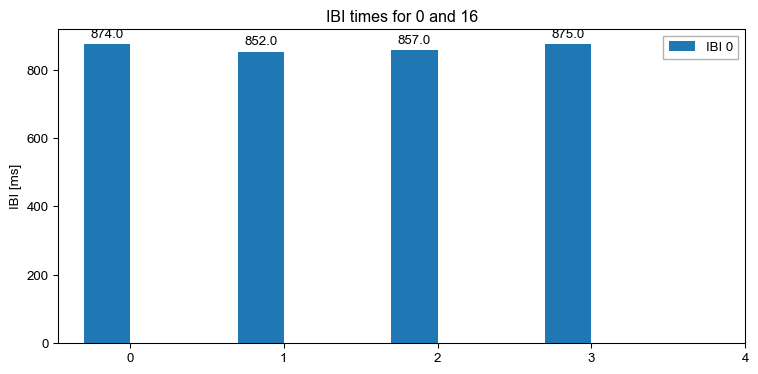

In [17]:
# TODO
#  Plot tachogramm for two IBI-series
ibi_plot_1 = ibi[0][lim1[0]:lim2[0]] + [np.nan]
ibi_plot_2 = ibi[1][lim1[1]:lim2[1]]

width = 0.3  # the width of the bars
x = np.arange(len(ibi_plot_1))  # the label locations

fig, ax = plt.subplots(figsize=(8,4), dpi=96)
rects1 = ax.bar(x - width/2, ibi_plot_1, width, label='IBI 0')
# rects2 = ax.bar(x + width/2, ibi_1_plot, width, label='IBI 16')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IBI [ms]')
ax.set_title('IBI times for 0 and 16')
ax.set_xticks(x)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


353 300000


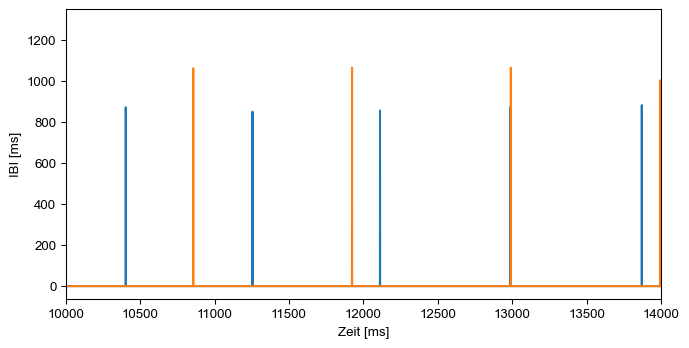

In [18]:
# Create tachogram
fig = plt.figure(figsize=figsize, dpi=dpi)

plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(ibi_ts[d])
plt.plot(ibi_ts[d+1])

print(len(ibi[0]),len(ibi_ts[0]))

303 300 300


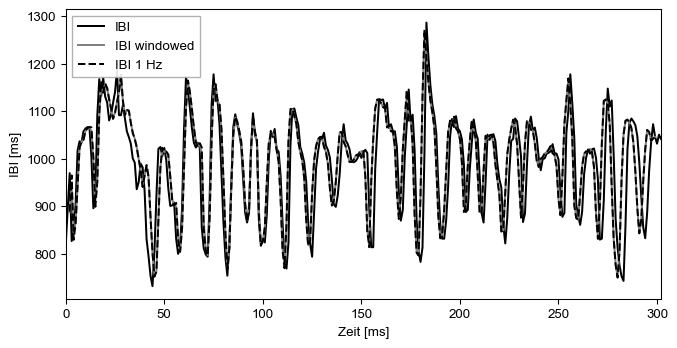

In [19]:
# Other plots
print(len(ibi[p]),len(ibi_ts_ip_1hz[p]),len(ibi_ts_ip_win[p]))

fig = plt.figure(figsize=figsize, dpi=dpi)

plt.margins(x=0)

plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')

plt.plot(np.array(ibi[p]),color="black", label="IBI")
plt.plot(np.array(ibi_ts_ip_win[p]),"-",color="grey", label="IBI windowed")
plt.plot(np.array(ibi_ts_ip_1hz[p]),"--",color="black", label="IBI 1 Hz")
plt.legend(loc="upper left")